#### Kutuphaneleri indirelim 

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dosyaYolu="/Users/abdulbarisoylemez/Documents/Visual Code/Yapay Zeka ve Bilgisayarlı Görü Mühendisi/TensorFlow_ile_Model_Egitimi/cicekler"


In [3]:
trainDatagen=ImageDataGenerator(rescale=1./255,validation_split=0.15)
testDatagen=ImageDataGenerator(rescale=1./255,validation_split=0.15)


In [4]:
print("Train Datagen :",trainDatagen," Test Datagen :",testDatagen)

Train Datagen : <keras.preprocessing.image.ImageDataGenerator object at 0x17ac1d880>  Test Datagen : <keras.preprocessing.image.ImageDataGenerator object at 0x17ac1d820>


In [5]:
trainDatagen=trainDatagen.flow_from_directory(dosyaYolu,target_size=(500,500),subset="training",batch_size=15)
testDatagen=testDatagen.flow_from_directory(dosyaYolu,target_size=(500,500),subset="validation",batch_size=15)

Found 2550 images belonging to 6 classes.
Found 449 images belonging to 6 classes.


In [6]:
print("Train Datagen :",trainDatagen," Test Datagen :",testDatagen)

Train Datagen : <keras.preprocessing.image.DirectoryIterator object at 0x17ac1deb0>  Test Datagen : <keras.preprocessing.image.DirectoryIterator object at 0x17ac1de20>


#### Verilerimizi Görseleştirelim 

(15, 500, 500, 3)
[0. 0. 1. 0. 0. 0.]


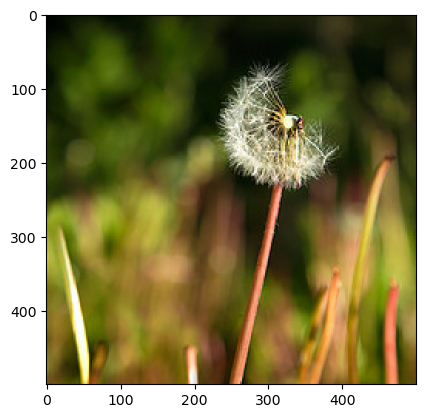

(15, 500, 500, 3)
[0. 1. 0. 0. 0. 0.]


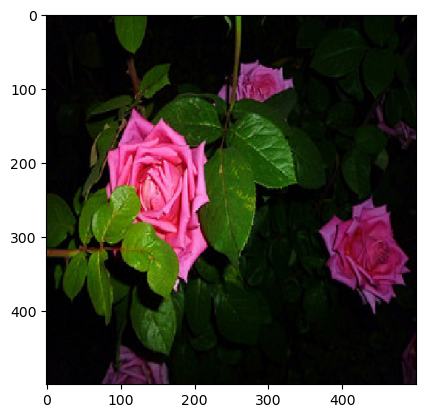

(15, 500, 500, 3)
[0. 0. 0. 0. 0. 1.]


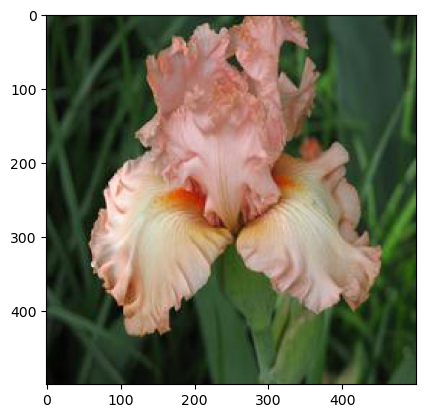

(15, 500, 500, 3)
[0. 0. 0. 1. 0. 0.]


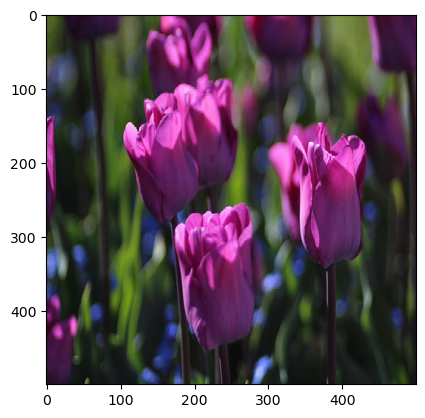

(15, 500, 500, 3)
[0. 0. 0. 1. 0. 0.]


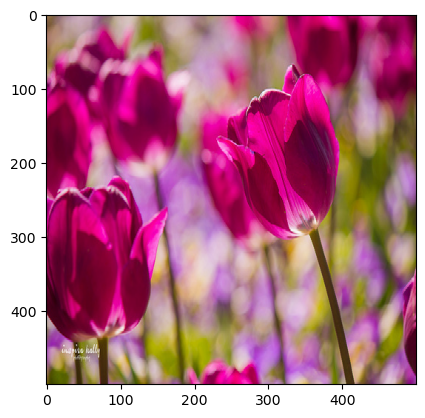

In [7]:
import matplotlib.pyplot as plt

for _ in range(5):
     img,label=testDatagen.next()
     print(img.shape)
     plt.imshow(img[0])
     print(label[0])
     plt.show()

#### Model oluşturmak için kütüphaneleri import edelim 

In [9]:
import tensorflow as tf
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


#### Sequential Modelimizi Oluşturalım

In [10]:


Model = Sequential()

Model.add(Conv2D(filters=6, activation="relu", kernel_size=(3, 3), input_shape=(500, 500, 3)))
Model.add(MaxPooling2D(2, 2))

Model.add(Conv2D(filters=12, activation="relu", kernel_size=(5, 5)))
Model.add(MaxPooling2D(2, 2))

Model.add(Conv2D(filters=12, activation="relu", kernel_size=(3, 3)))
Model.add(MaxPooling2D(2, 2))

Model.add(Conv2D(filters=24, activation="relu", kernel_size=(3, 3)))
Model.add(MaxPooling2D(2, 2))

Model.add(Conv2D(filters=24, activation="relu", kernel_size=(2, 2)))

Model.add(Flatten())

Model.add(Dense(24, activation="relu"))
Model.add(Dense(48, activation="relu"))
Model.add(Dense(96, activation="relu"))
Model.add(Dense(96, activation="relu"))
Model.add(Dense(24, activation="relu"))
Model.add(Dense(6, activation="softmax"))


In [11]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 6)       168       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 6)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 245, 245, 12)      1812      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 122, 122, 12)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 12)      1308      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 12)       0

### Model Eğitimi

In [12]:
# Eski Keras optimizasyonunu kullan
optimizer = tf.keras.optimizers.legacy.Adamax(learning_rate=0.001)

# Kayıp fonksiyonunu tanımla
loss = tf.keras.losses.CategoricalCrossentropy()

In [13]:
# Modeli derle
Model.compile(optimizer=optimizer, loss=loss, metrics=["mse", "accuracy"])

In [14]:
# Modeli eğit
result = Model.fit(trainDatagen, epochs=10, verbose=1, validation_data=testDatagen)

Epoch 1/10


2023-12-10 22:24:20.306390: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-10 22:24:20.337990: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


170/170 [==============================] - ETA: 0s - loss: 1.6437 - mse: 0.1295 - accuracy: 0.2800

2023-12-10 22:25:41.639930: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


170/170 [==============================] - 85s 500ms/step - loss: 1.6437 - mse: 0.1295 - accuracy: 0.2800 - val_loss: 1.4538 - val_mse: 0.1192 - val_accuracy: 0.3742
Epoch 2/10
170/170 [==============================] - 85s 499ms/step - loss: 1.3251 - mse: 0.1090 - accuracy: 0.4278 - val_loss: 1.2717 - val_mse: 0.1055 - val_accuracy: 0.4922
Epoch 3/10
170/170 [==============================] - 84s 497ms/step - loss: 1.0399 - mse: 0.0872 - accuracy: 0.5894 - val_loss: 1.1048 - val_mse: 0.0888 - val_accuracy: 0.6036
Epoch 4/10
170/170 [==============================] - 84s 496ms/step - loss: 0.8865 - mse: 0.0749 - accuracy: 0.6729 - val_loss: 1.0255 - val_mse: 0.0839 - val_accuracy: 0.6080
Epoch 5/10
170/170 [==============================] - 85s 501ms/step - loss: 0.7969 - mse: 0.0670 - accuracy: 0.7039 - val_loss: 0.9794 - val_mse: 0.0777 - val_accuracy: 0.6503
Epoch 6/10
170/170 [==============================] - 87s 512ms/step - loss: 0.7437 - mse: 0.0624 - accuracy: 0.7365 - val_los

In [15]:
result.history

{'loss': [1.6437063217163086,
  1.3251465559005737,
  1.0399068593978882,
  0.8865379095077515,
  0.7968651652336121,
  0.7437163591384888,
  0.6937800049781799,
  0.6572167277336121,
  0.6237324476242065,
  0.5772641897201538],
 'mse': [0.12948381900787354,
  0.10895632207393646,
  0.08721716701984406,
  0.07487064599990845,
  0.06700354814529419,
  0.062436606734991074,
  0.05848156660795212,
  0.05529578775167465,
  0.0527920238673687,
  0.048297859728336334],
 'accuracy': [0.2800000011920929,
  0.4278431236743927,
  0.589411735534668,
  0.6729411482810974,
  0.7039215564727783,
  0.7364705801010132,
  0.7403921484947205,
  0.7639215588569641,
  0.7698039412498474,
  0.794901967048645],
 'val_loss': [1.453770637512207,
  1.2717366218566895,
  1.1048495769500732,
  1.025518536567688,
  0.9794192314147949,
  0.9282448291778564,
  0.9698215126991272,
  0.9624726176261902,
  0.9038214683532715,
  0.9219222664833069],
 'val_mse': [0.1191672831773758,
  0.10545660555362701,
  0.0888214334

#### Model testi

In [16]:
results = Model.evaluate(testDatagen)
print("Test Loss:", results[0])
print("Test Accuracy:", results[2])

 1/30 [>.............................] - ETA: 5s - loss: 1.1535 - mse: 0.0747 - accuracy: 0.6667

2023-12-10 22:39:43.430940: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


30/30 [==============================] - 4s 130ms/step - loss: 0.9219 - mse: 0.0720 - accuracy: 0.6971
Test Loss: 0.9219221472740173
Test Accuracy: 0.6971046924591064


#### Test veri seti üzerinde Test

{'Ayçiçeği': 0, 'Gül': 1, 'Karahindiba': 2, 'Lale': 3, 'Papatya': 4, 'Süsen': 5}
1/1 [==============================] - 0s 230ms/step
tür : Karahindiba


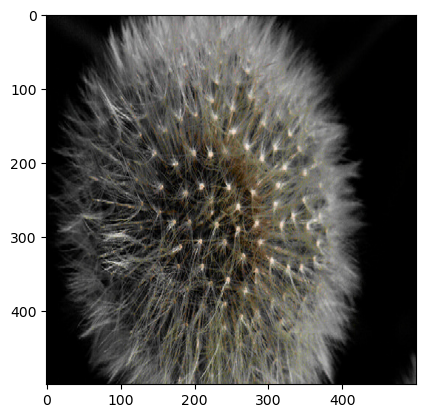

1/1 [==============================] - 0s 168ms/step
tür : Ayçiçeği


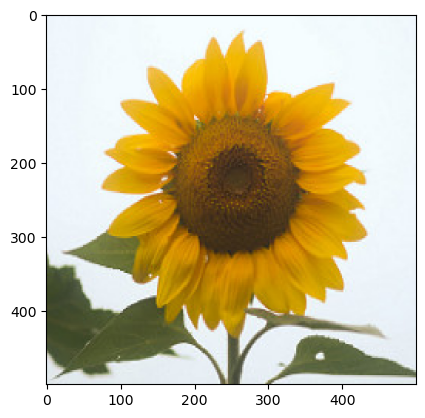

1/1 [==============================] - 0s 174ms/step
tür : Papatya


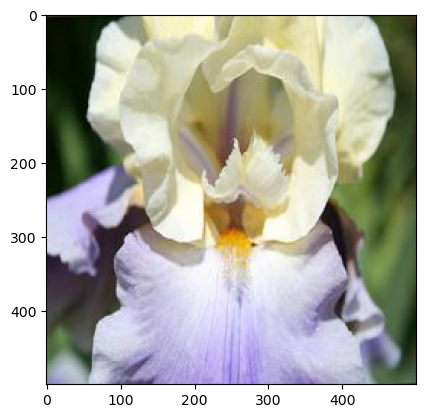

1/1 [==============================] - 0s 189ms/step
tür : Lale


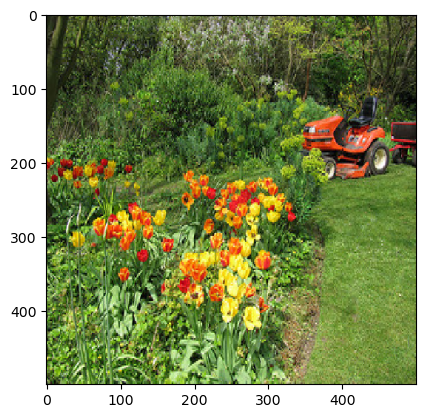

1/1 [==============================] - 0s 174ms/step
tür : Ayçiçeği


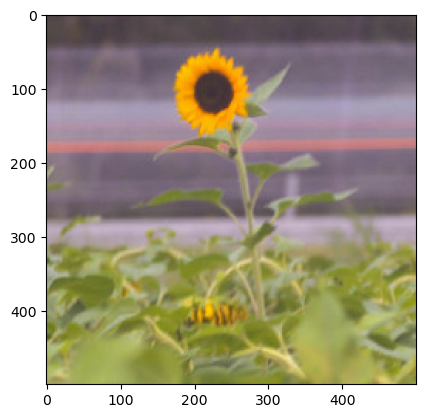

In [17]:
print(testDatagen.class_indices)
for _ in range(5):
     img,label=testDatagen.next()
     a=Model.predict(img)
     np.argmax(a[0])
     
     if np.argmax(a[0])==0:
          print("tür : Ayçiçeği")
     if np.argmax(a[0])==1:
          print("tür : Gül")
     if np.argmax(a[0])==2:
          print("tür : Karahindiba")
     if np.argmax(a[0])==3:
          print("tür : Lale")
     if np.argmax(a[0])==4:
          print("tür : Papatya")
     if np.argmax(a[0])==5:
          print("tür : Süsen")
     plt.imshow(img[0])
     plt.show()



### Tek resim üzerinden gösterme 

In [18]:
from PIL import Image
from skimage import transform 

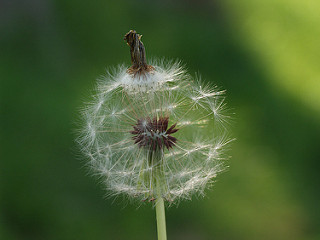

In [19]:
Dyolu="/Users/abdulbarisoylemez/Documents/Visual Code/Yapay Zeka ve Bilgisayarlı Görü Mühendisi/TensorFlow_ile_Model_Egitimi/a.jpg"
Dyolu=Image.open(Dyolu)
Dyolu

In [20]:
def TekResim(path):
    foto = Image.open(path)
    foto = np.array(foto).astype("float32") / 255
    foto = transform.resize(foto, (500, 500, 3))
    foto = np.expand_dims(foto, axis=0)  # Modelin beklentisine göre boyut ekleyin
    return foto

Dyolu = "/Users/abdulbarisoylemez/Documents/Visual Code/Yapay Zeka ve Bilgisayarlı Görü Mühendisi/TensorFlow_ile_Model_Egitimi/a.jpg"
foto = TekResim(Dyolu)
pred = Model.predict(foto)

# Sınıf endeksini ve sınıf adını eşleştiren bir sözlük
class_indices = {'Ayçiçeği': 0, 'Gül': 1, 'Karahindiba': 2, 'Lale': 3, 'Papatya': 4, 'Süsen': 5}

# Tahmin edilen sınıf endeksini bul
predicted_class_index = np.argmax(pred)

# Sınıf adını al
predicted_class_name = list(class_indices.keys())[predicted_class_index]

print("Tahmin Edilen Sınıf:", predicted_class_name)


1/1 [==============================] - 0s 20ms/step
Tahmin Edilen Sınıf: Karahindiba


### bütün verileri ve tahminleri karşılaştıralım 

In [21]:
Test_a=Model.predict(testDatagen)

2023-12-10 22:40:36.180521: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


30/30 [==============================] - 4s 131ms/step


### Modelimizi Kaydedelim

In [63]:
Model.save("saveModel/")

INFO:tensorflow:Assets written to: saveModel/assets


INFO:tensorflow:Assets written to: saveModel/assets


In [23]:
Model.evaluate(testDatagen)

 1/30 [>.............................] - ETA: 5s - loss: 0.5484 - mse: 0.0494 - accuracy: 0.8667

2023-12-10 22:41:10.086358: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


30/30 [==============================] - 4s 132ms/step - loss: 0.9219 - mse: 0.0720 - accuracy: 0.6971


[0.9219220280647278, 0.07200349122285843, 0.6971046924591064]

In [24]:
Model.evaluate(trainDatagen)

  1/170 [..............................] - ETA: 29s - loss: 0.3959 - mse: 0.0345 - accuracy: 0.8000

2023-12-10 22:41:20.886094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


170/170 [==============================] - 23s 136ms/step - loss: 0.5346 - mse: 0.0446 - accuracy: 0.8145


[0.5346240997314453, 0.04458869248628616, 0.8145098090171814]

### Model sonuçlarını görseleştirelim

In [25]:
acc = result.history["accuracy"]
val_acc = result.history["val_accuracy"]
loss = result.history["loss"]
val_loss = result.history["val_loss"]


In [26]:
epoch=range(1,len(acc)+1)

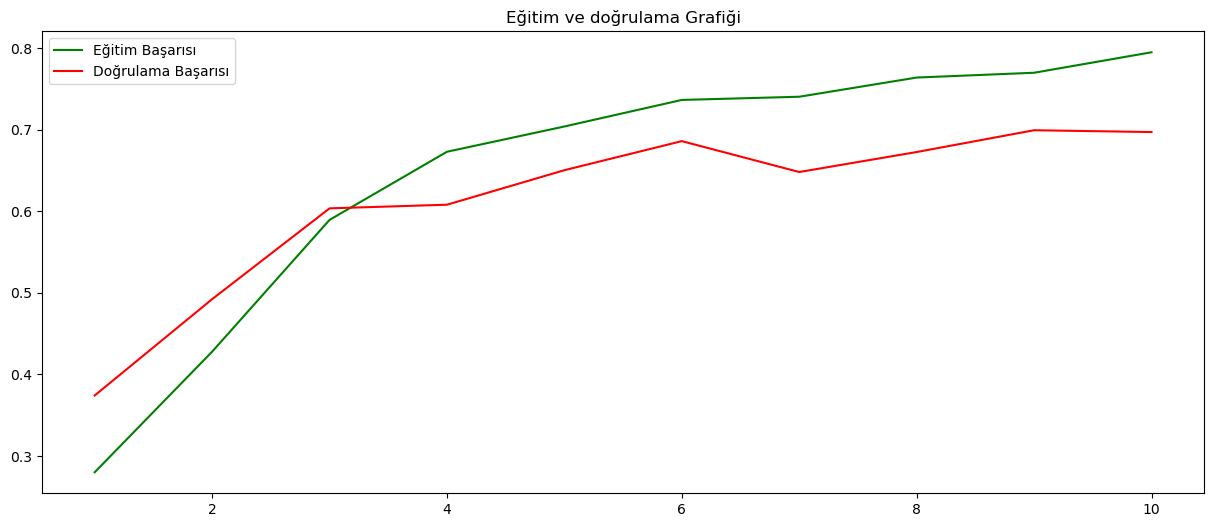

In [27]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("Eğitim Başarısı"),color="g")
plt.plot(epoch,val_acc,label=("Doğrulama Başarısı"),color="r")
plt.title("Eğitim ve doğrulama Grafiği")
plt.legend()

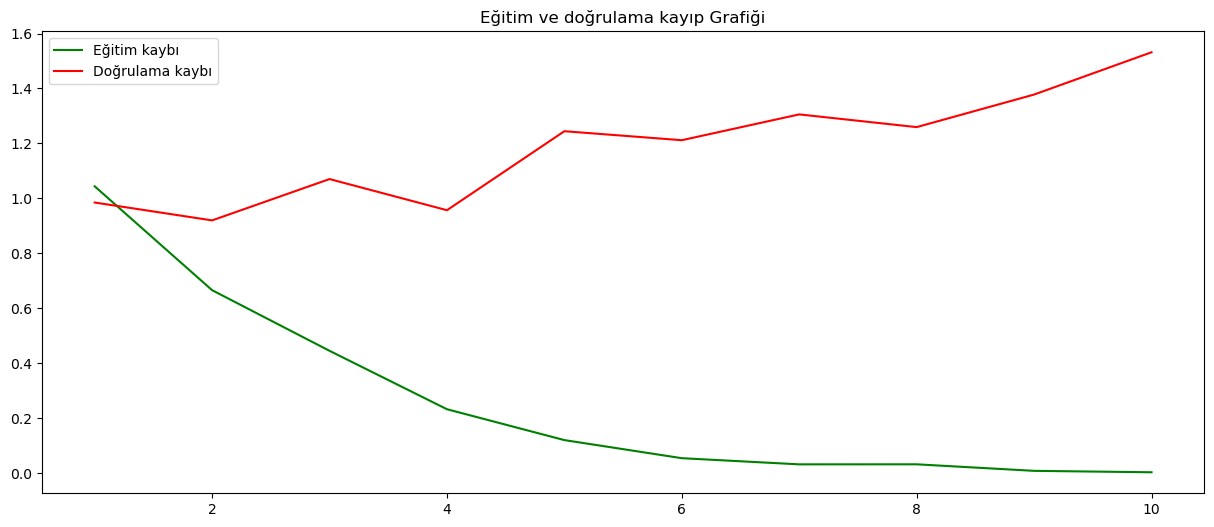

In [67]:
plt.figure(figsize=(15,6))
plt.plot(epoch,loss,label=("Eğitim kaybı"),color="g")
plt.plot(epoch,val_loss,label=("Doğrulama kaybı"),color="r")
plt.title("Eğitim ve doğrulama kayıp Grafiği")
plt.legend()